In [1]:
from experiment import Experiment
from utils.behavior_data import BehaviorData
from utils.content import StatesHandler
from visuals import Plotter
import torch
import numpy as np
from utils.state_data import StateData
import matplotlib.pyplot as plt

In [2]:
# ageMatching = [0, 1, 2, 3]
ageMatching = [2, 3]
# ageMatching = [0, 1]
respondPerc = .25



def load_questionnaire_states(endline=False, detail=0, aiset=True):
        if (detail > 1):
            sh = StatesHandler(map="map_individual.json", endline=endline)
        elif (detail > 0):
            sh = StatesHandler(map="map_detailed.json", endline=endline)
        else:
            sh = StatesHandler(map="map.json", endline=endline)
        whatsapps, states = sh.compute_states()
        def modify_whatsapp(x):
            # helper function to parse the whatsapp numbers
            x = str(x)
            x = x[len(x)-10:]
            return int(x)
        participantIDs = torch.tensor(np.loadtxt("arogya_content/all_ai_participants.csv", delimiter=",", skiprows=1, dtype="int64"))
        participantIDs[:, 1].apply_(modify_whatsapp)
        
        # filter responses to only include ones in the AI participant set
        isect, idIdxs, stateIdxs = np.intersect1d(participantIDs[:, 1], whatsapps, return_indices=True)
        if (aiset):
            # combine the glific IDs with the states into a dictionary and return
            return dict(zip(participantIDs[idIdxs, 0].numpy(), states[stateIdxs].numpy()))
        else:
            if (True):
                stats = np.delete(states.numpy(), stateIdxs, axis=0)
                wapps = np.delete(whatsapps.numpy(), stateIdxs)
            else:
                stats = states.numpy()
                wapps = whatsapps.numpy()
            return dict(zip(wapps, stats))
        
post = load_questionnaire_states(True, 1, True)
print(len(post))
pre = load_questionnaire_states(False, 1, True)
print(len(pre))


diffs = []
demos = []

bd = BehaviorData(minw=2, maxw=29, include_state=True, include_pid=False, top_respond_perc=.25)

for glifid in post.keys():
    if glifid in pre and glifid in bd.data['pid'].to_numpy():
        diffs.append(post[glifid] - pre[glifid])
        demos.append(pre[glifid][-3:])
    else:
        None
        #print(glifid)
    
print(len(diffs))

demos = np.array(demos)
allDiffValsAI = np.array(diffs)[:, 0:-3]


480
806
402 537
(3470, 38) (3470, 8)
122


In [3]:
ages, counts = np.unique(demos[:, 0], return_counts=True)
print("Age brackets (18-25, 26-35, 36-50, 51+): ", counts)
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4));
# ax.boxplot(demos[:, 0], meanline=True, showmeans=True);
# ax.set(title="Age")
ageMatch = np.isin(demos[:, 0], ageMatching)
diffValsAI = allDiffValsAI[ageMatch]

Age brackets (18-25, 26-35, 36-50, 51+):  [33 40 41  8]


In [4]:
post = load_questionnaire_states(True, 1, False)
print(len(post))
pre = load_questionnaire_states(False, 1, False)
print(len(pre))


diffs = []
demos = []

for glifid in post.keys():
    if glifid in pre:
        diffs.append(post[glifid] - pre[glifid])
        demos.append(pre[glifid][-3:])
    else:
        None
        
allDiffValsNAI = np.array(diffs)[:, 0:-3]
demos = np.array(demos)
print(len(diffs))

568
807
441


In [5]:
ages, counts = np.unique(demos[:, 0], return_counts=True)
print("Age brackets (18-25, 26-35, 36-50, 51+): ", counts)
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4));
# ax.boxplot(demos[:, 0], meanline=True, showmeans=True);
# ax.set(title="Age")
ageMatch = np.isin(demos[:, 0], ageMatching)
diffValsNAI = allDiffValsNAI[ageMatch]

Age brackets (18-25, 26-35, 36-50, 51+):  [114 141 155  31]


Component                     	Baseline Mean  	AI Mean   
_____________________________________________________________________________________________
Healthy Fruits                :	-0.07796,	0.00000
Healthy Vegetables            :	-0.02151,	0.00680
Healthy Snacks/Breakfast      :	-0.04409,	0.00408
Healthy Other                 :	-0.04409,	0.00408
Unhealthy Tobacco             :	0.06720,	0.04082
Unhealthy Alcohol             :	0.06720,	0.04082
Unhealthy Restaurant          :	0.05914,	-0.12245
Unhealthy Junk                :	0.07527,	0.20408
Fitness Overall               :	0.07419,	0.19796
Fitness Sports                :	0.15591,	0.22449
Fitness Gym                   :	0.22581,	0.30612
Fitness Walking               :	-0.02151,	0.11905
Cause Knowledge Overall       :	0.19176,	0.33333
Cause Weight                  :	0.32258,	0.28571
Cause Diet                    :	0.22581,	0.24490
Cause Exercise                :	0.23118,	0.34694
Complication Knowledge        :	0.08525,	-0.00292


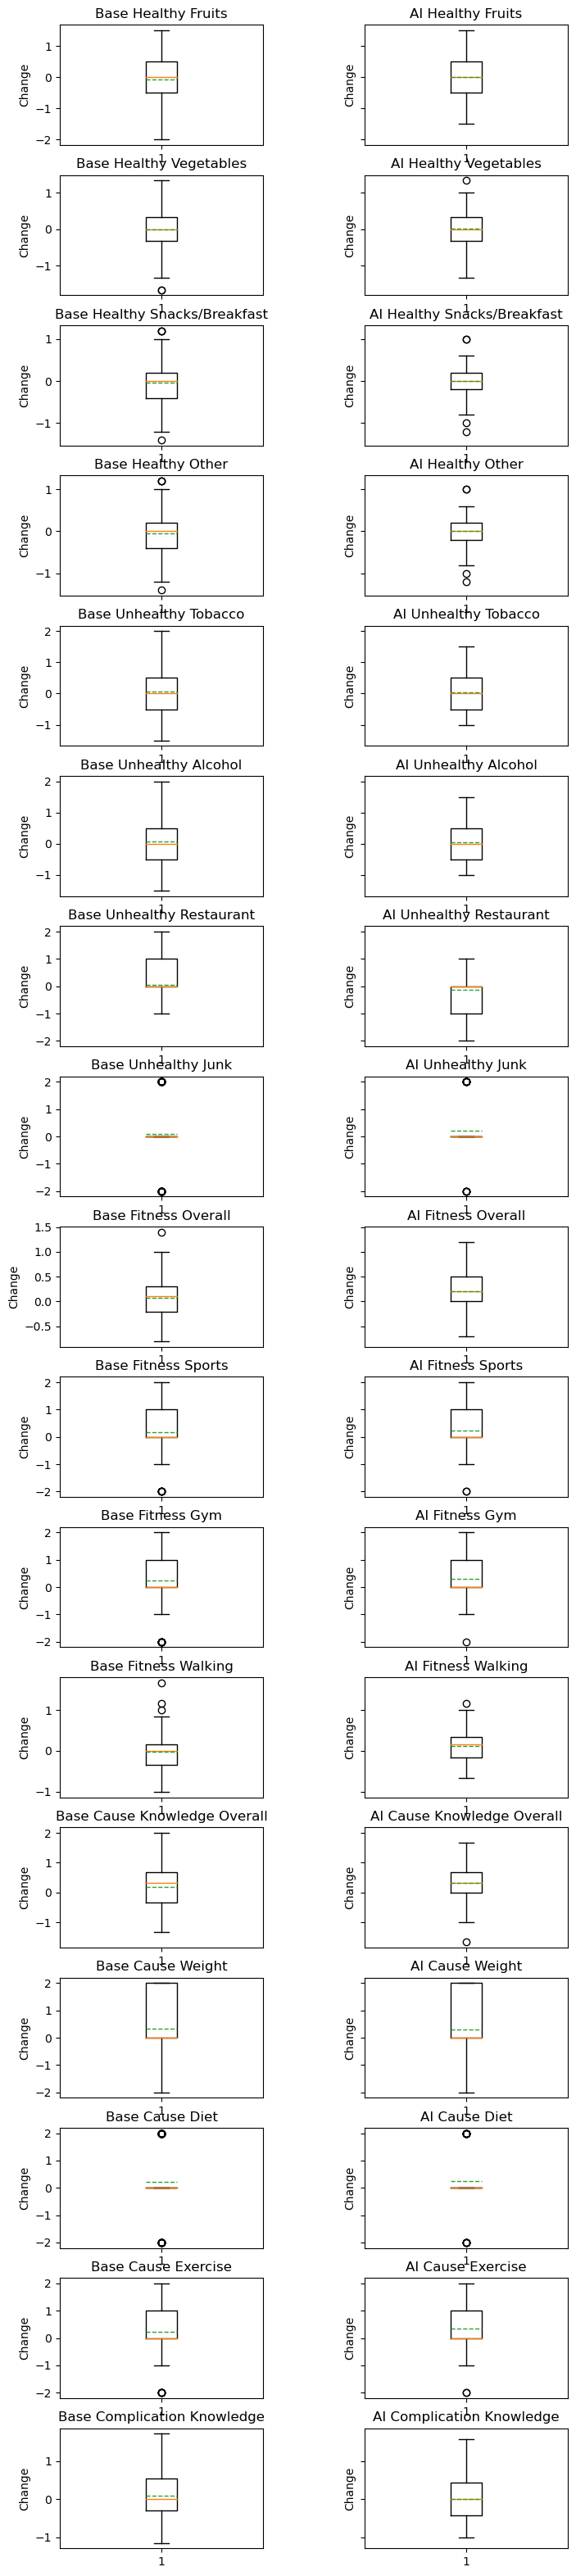

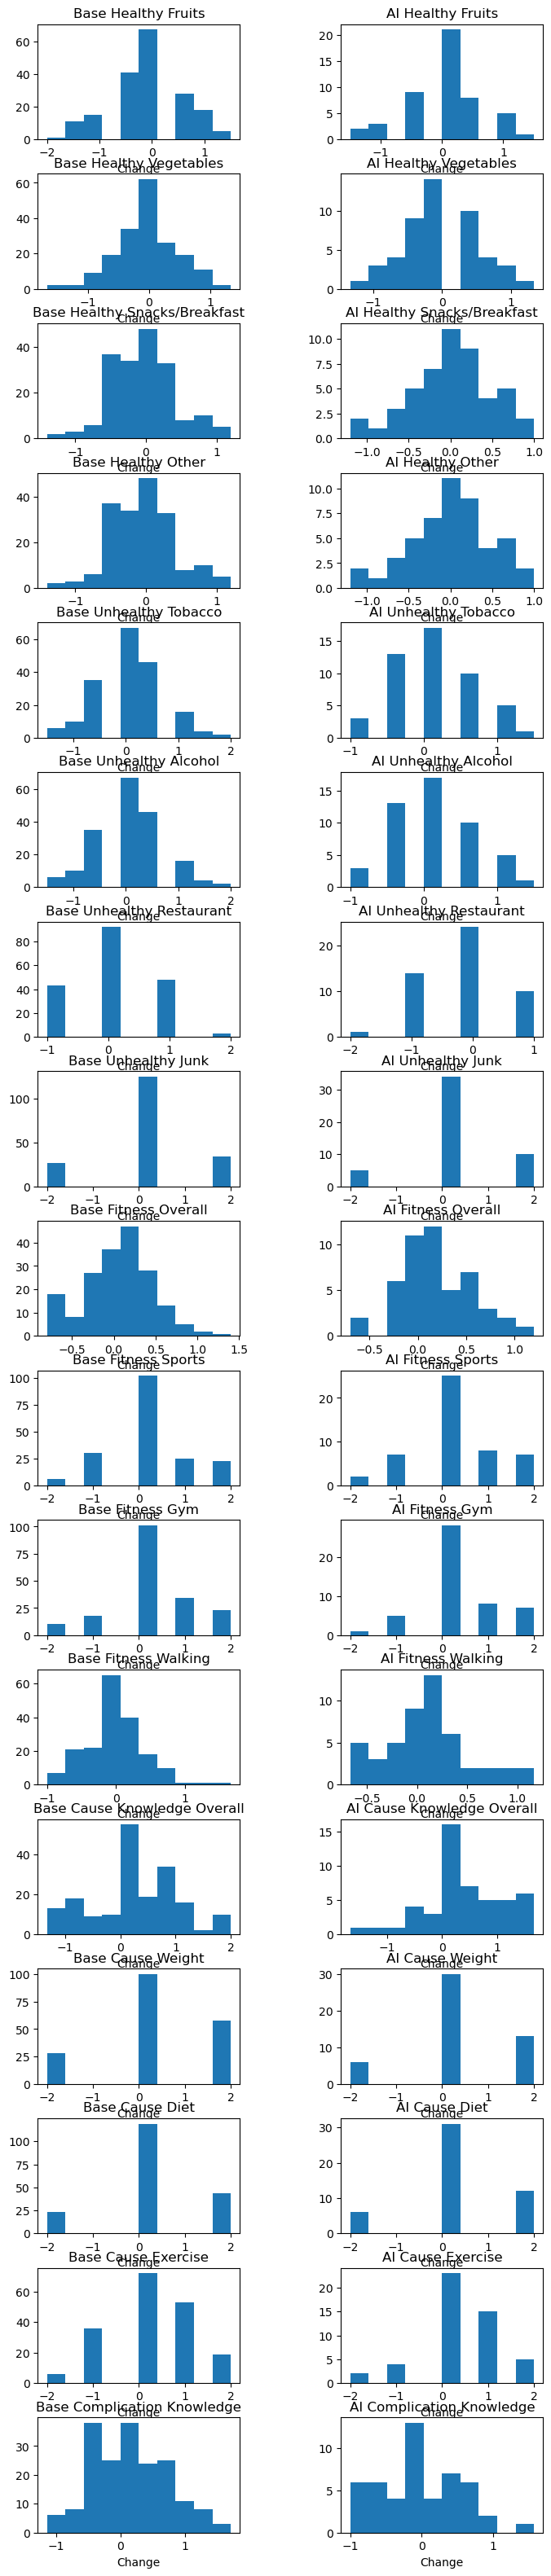

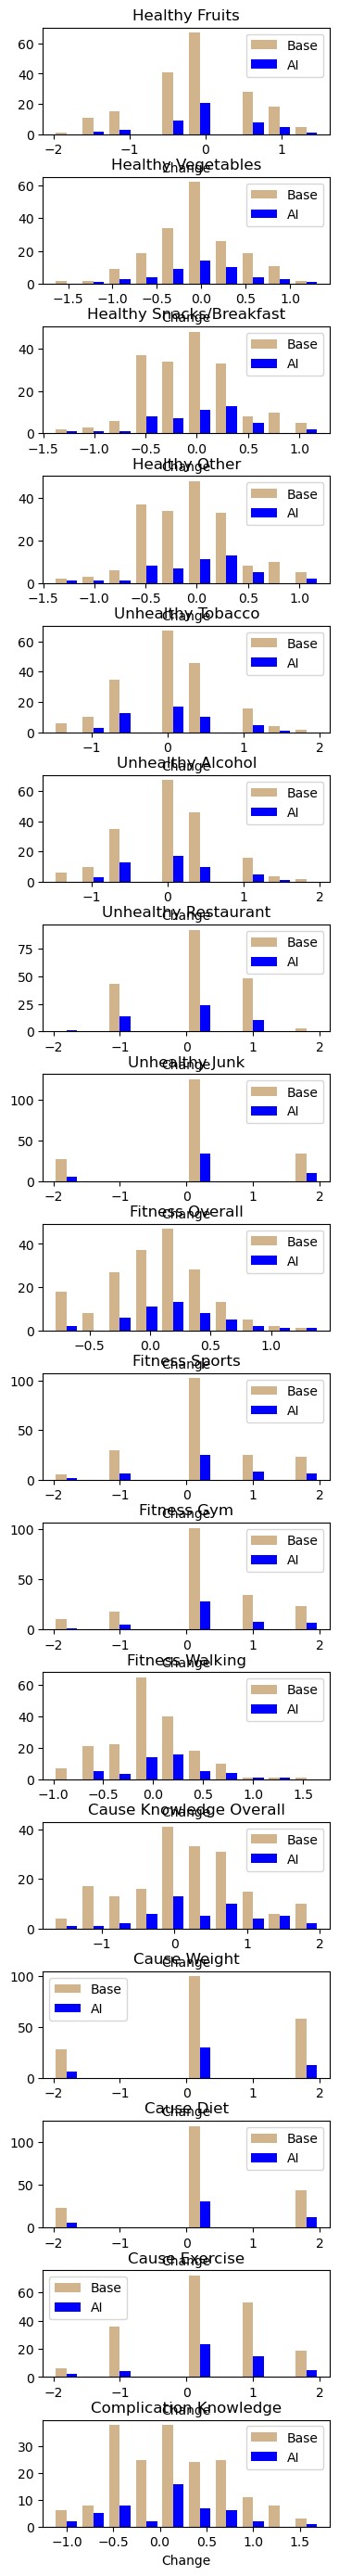

In [6]:

allDiffMeansAI = allDiffValsAI.mean(axis=0)
diffMeansAI = diffValsAI.mean(axis=0)
diffMeansNAI = diffValsNAI.mean(axis=0)

elem_map = [
      "Healthy Fruits",
      "Healthy Vegetables",
      "Healthy Snacks/Breakfast",
      "Healthy Other",
      "Unhealthy Tobacco",
      "Unhealthy Alcohol",
      "Unhealthy Restaurant",
      "Unhealthy Junk",
      "Fitness Overall",
      "Fitness Sports",
      "Fitness Gym",
      "Fitness Walking",
      "Cause Knowledge Overall",
      "Cause Weight",
      "Cause Diet",
      "Cause Exercise",
      "Complication Knowledge"
]

maxLen = max(elem_map, key=len)
numFigs = len(elem_map)

print(f'{"Component":30}\t{"Baseline Mean":15}\t{"AI Mean":10}')

print("_____________________________________________________________________________________________")

for x in range(numFigs):
    print(f'{elem_map[x]:30}:\t{diffMeansNAI[x]:.5f},\t{diffMeansAI[x]:.5f}')

fig, ax = plt.subplots(nrows=numFigs, ncols=2, sharey="row", figsize=(8, 40));
for x in range(numFigs):
    ax[x, 0].boxplot(diffValsNAI[:, x], meanline=True, showmeans=True);
    ax[x, 0].set(title="Base " + elem_map[x], ylabel="Change")
    ax[x, 1].boxplot(diffValsAI[:, x], meanline=True, showmeans=True);
    ax[x, 1].set(title="AI " + elem_map[x], ylabel="Change")
plt.subplots_adjust(hspace=.25, wspace=.5)

fig, ax = plt.subplots(nrows=numFigs, ncols=2, figsize=(8, 40));
for x in range(numFigs):
    ax[x, 0].hist(diffValsNAI[:, x]);
    ax[x, 0].set(title="Base " + elem_map[x], xlabel="Change")
    ax[x, 1].hist(diffValsAI[:, x]);
    ax[x, 1].set(title="AI " + elem_map[x], xlabel="Change")
plt.subplots_adjust(hspace=.30, wspace=.5)


fig, ax = plt.subplots(nrows=numFigs, ncols=1, figsize=(4, 35));
for x in range(numFigs):
    ax[x].hist([diffValsNAI[:, x], diffValsAI[:, x]], color=['tan', 'blue'], label=['Base', 'AI'], stacked=False);
    ax[x].set(title=elem_map[x], xlabel="Change")
    ax[x].legend()
plt.subplots_adjust(hspace=.40, wspace=.25)